## Conducting Data Cleaning and Exploratory Data Analysis (EDA) on the Titanic Dataset

## Read the data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# The dataset
file_path = '/content/titanic.csv'
titanic_df = pd.read_csv(file_path)
print(titanic_df.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


## Missing values

In [33]:
# Check the missing values
missing_values = titanic_df.isnull().sum()
print(missing_values)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [34]:
# Summary
summary_stats = titanic_df.describe()
print(summary_stats)

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

## Visualization

In [35]:
sns.set(style="whitegrid")

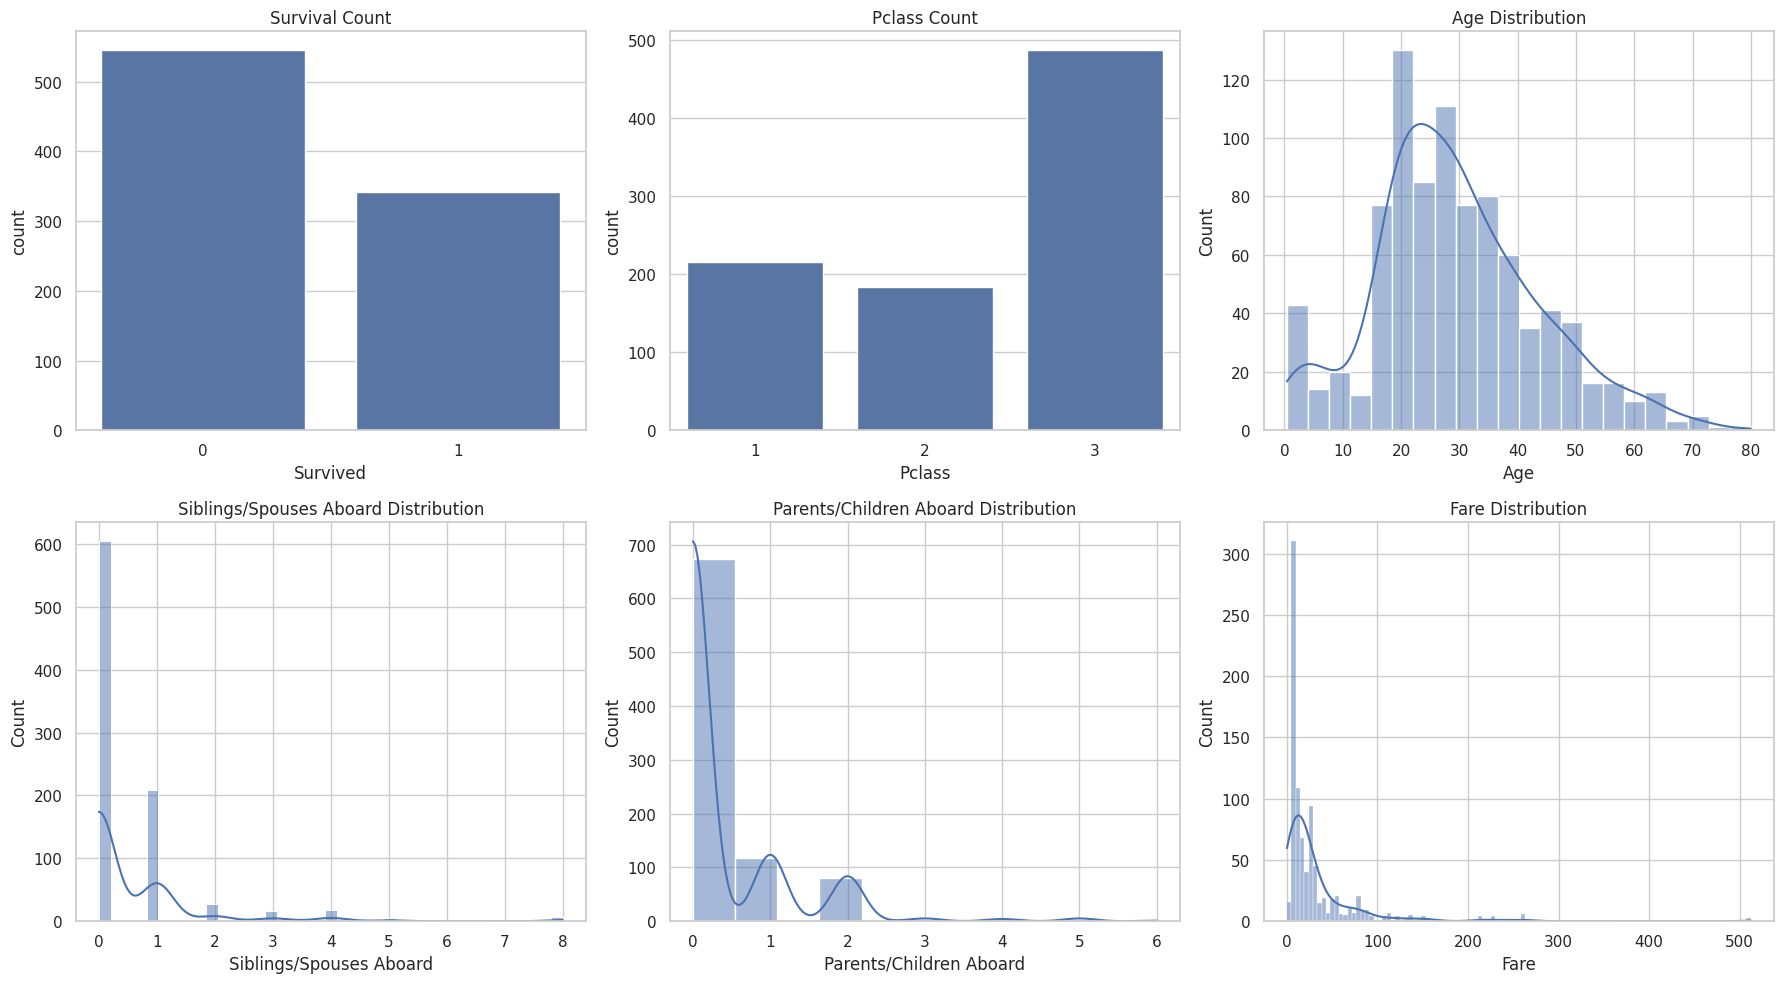

In [36]:
# histograms
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Survived
sns.countplot(ax=axes[0, 0], data=titanic_df, x='Survived')
axes[0, 0].set_title('Survival Count')

# Pclass
sns.countplot(ax=axes[0, 1], data=titanic_df, x='Pclass')
axes[0, 1].set_title('Pclass Count')

# Age
sns.histplot(ax=axes[0, 2], data=titanic_df, x='Age', kde=True)
axes[0, 2].set_title('Age Distribution')

# Siblings/Spouses Aboard
sns.histplot(ax=axes[1, 0], data=titanic_df, x='Siblings/Spouses Aboard', kde=True)
axes[1, 0].set_title('Siblings/Spouses Aboard Distribution')

# Parents/Children Aboard
sns.histplot(ax=axes[1, 1], data=titanic_df, x='Parents/Children Aboard', kde=True)
axes[1, 1].set_title('Parents/Children Aboard Distribution')

# Fare
sns.histplot(ax=axes[1, 2], data=titanic_df, x='Fare', kde=True)
axes[1, 2].set_title('Fare Distribution')

plt.tight_layout()
plt.show()


## Investigate relationships between variables

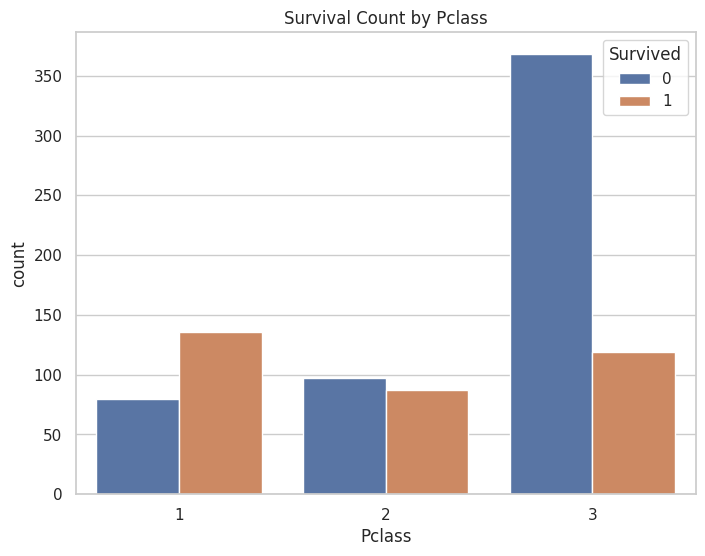

In [37]:
# Survival vs. Pclass
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Pclass')
plt.show()


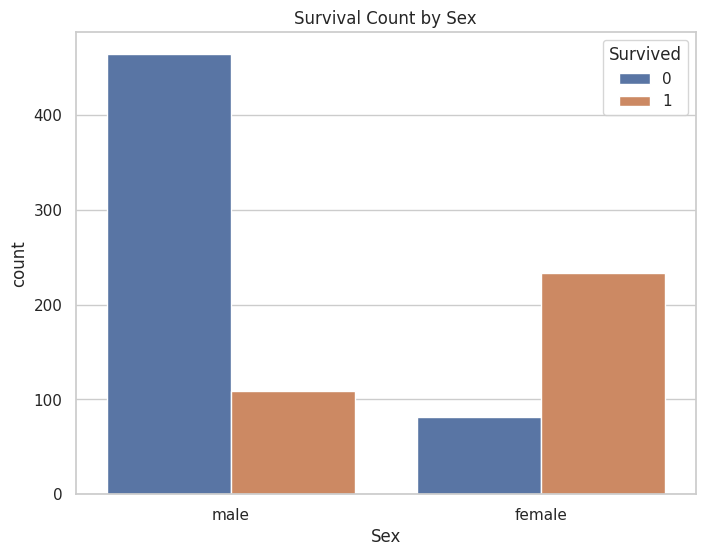

In [38]:
# Survival vs. Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()



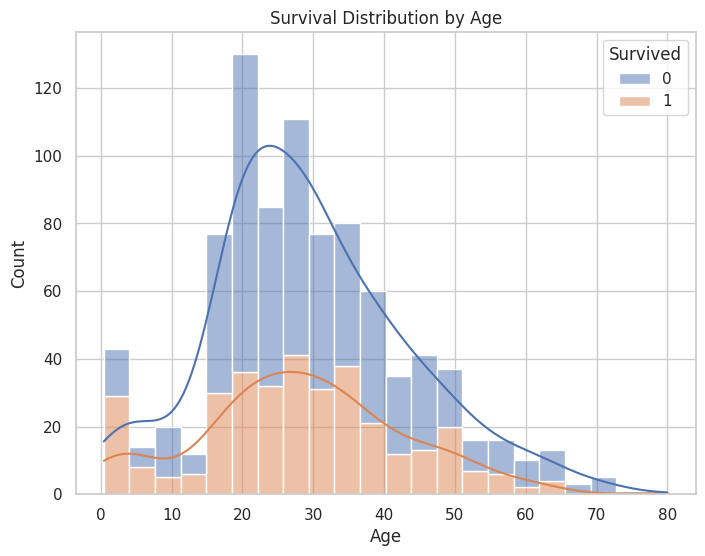

In [39]:
# Survival vs. Age
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Distribution by Age')
plt.show()

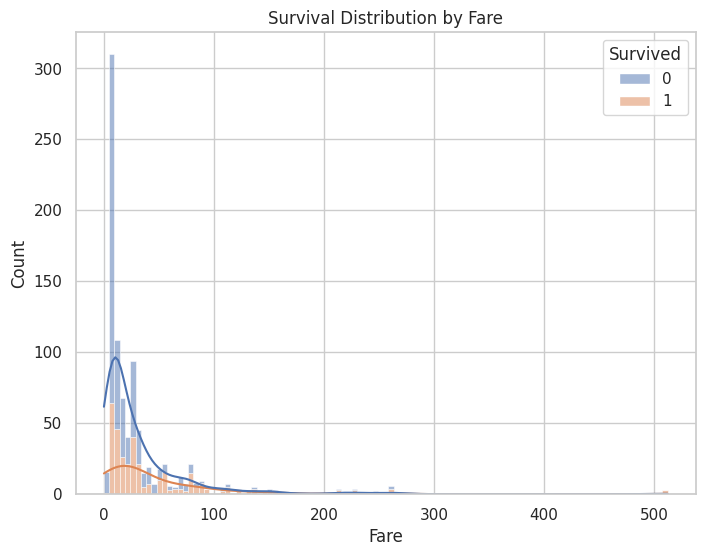

In [40]:
# Survival vs. Fare
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_df, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Distribution by Fare')
plt.show()

## Correlation

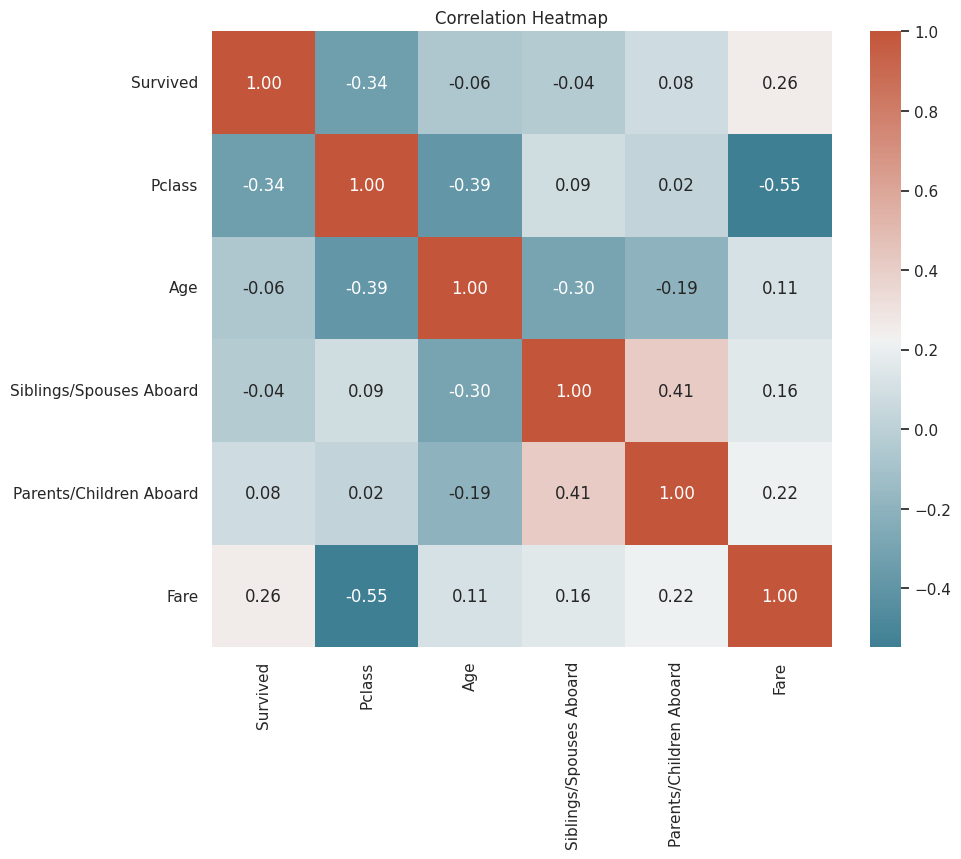

In [49]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = titanic_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
diverging_palette = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=diverging_palette, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Visualizations

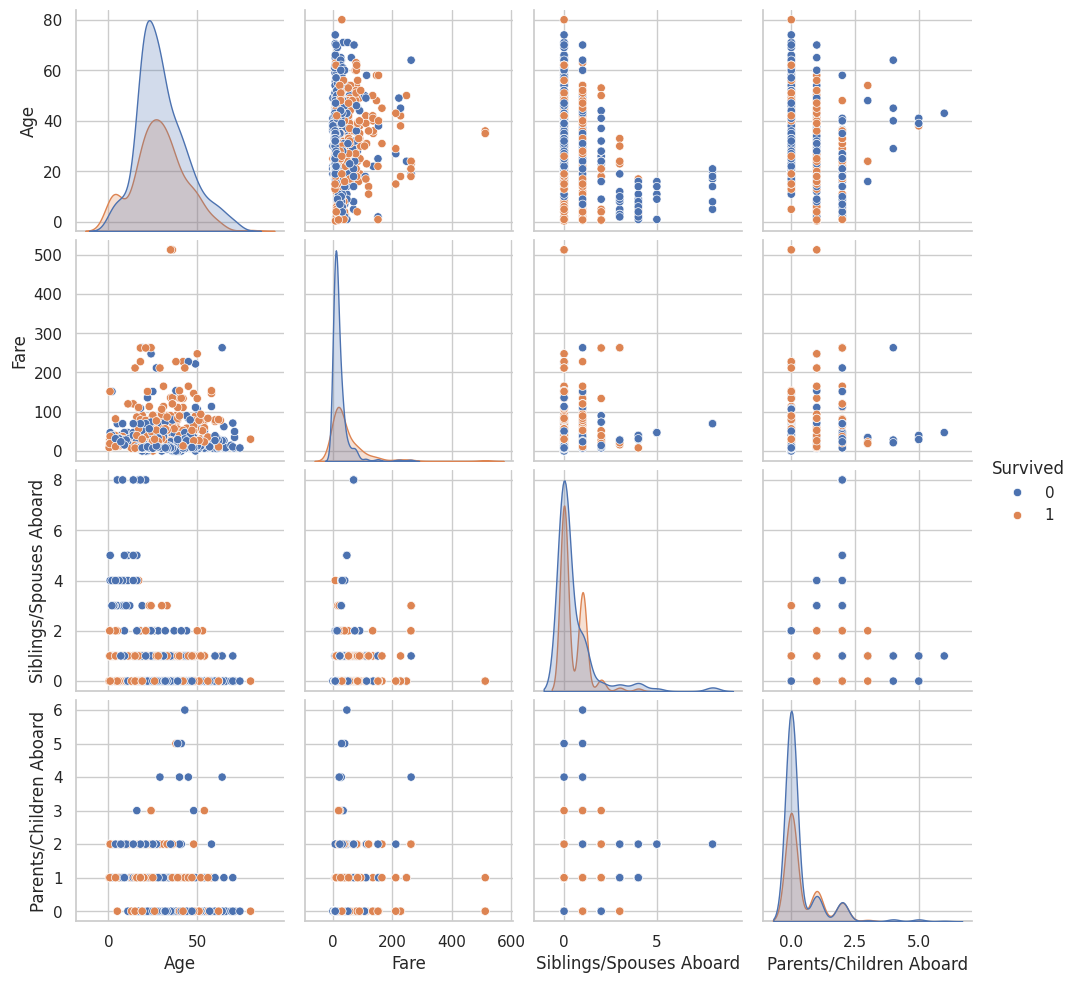

In [51]:
# Pair plot for numerical features
sns.pairplot(titanic_df, hue='Survived', vars=['Age', 'Fare', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'])
plt.show()

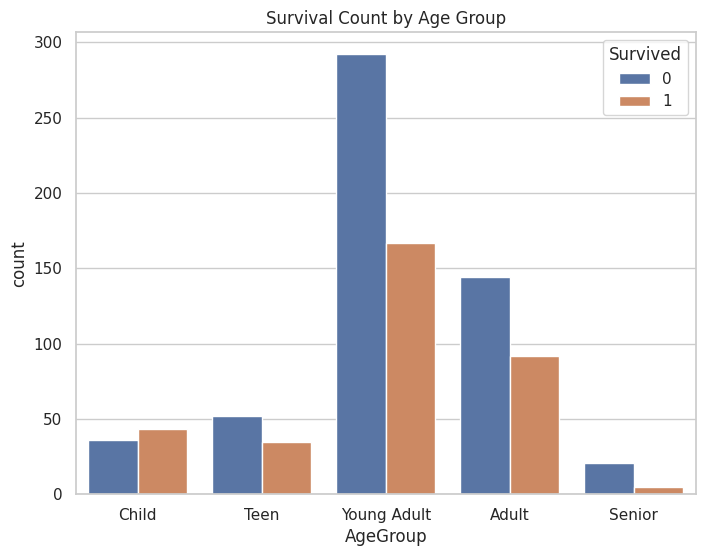

In [52]:
# Survival rate by age group
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='AgeGroup', hue='Survived')
plt.title('Survival Count by Age Group')
plt.show()

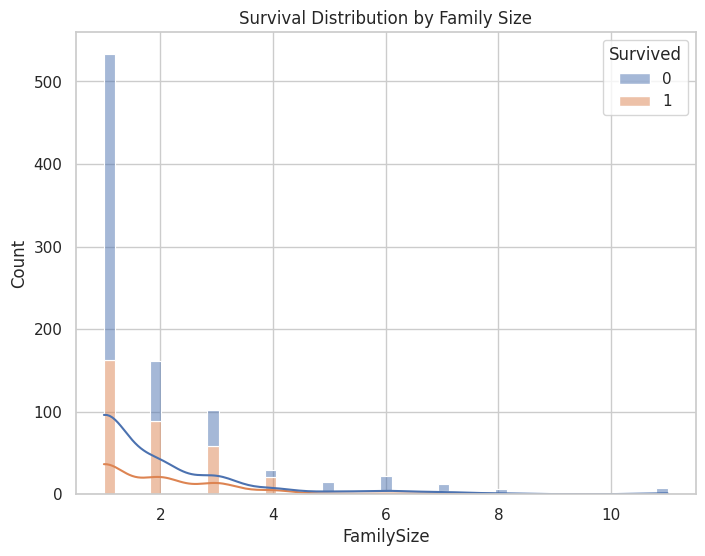

In [53]:
# Survival rate by family size
titanic_df['FamilySize'] = titanic_df['Siblings/Spouses Aboard'] + titanic_df['Parents/Children Aboard'] + 1
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_df, x='FamilySize', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Distribution by Family Size')
plt.show()

In [54]:
# Detailed survival rate by family size
family_survival_rate = titanic_df[['FamilySize', 'Survived']].groupby('FamilySize').mean()
print(family_survival_rate)

            Survived
FamilySize          
1           0.305816
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000


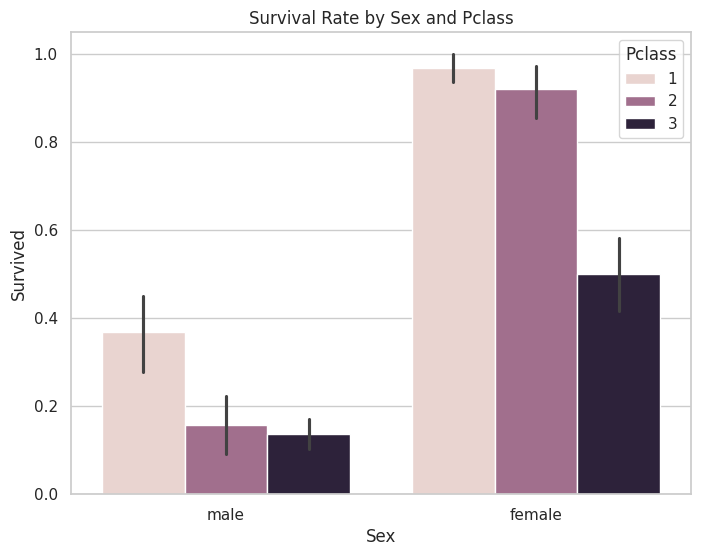

In [55]:
# Survival rate by sex and class
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic_df, x='Sex', y='Survived', hue='Pclass')
plt.title('Survival Rate by Sex and Pclass')
plt.show()

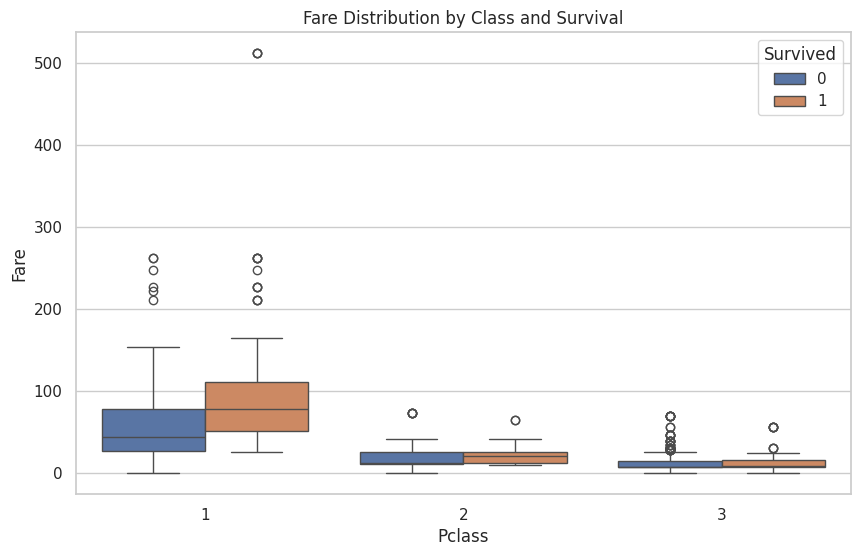

In [56]:
# Fare distribution by class and survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df, x='Pclass', y='Fare', hue='Survived')
plt.title('Fare Distribution by Class and Survival')
plt.show()

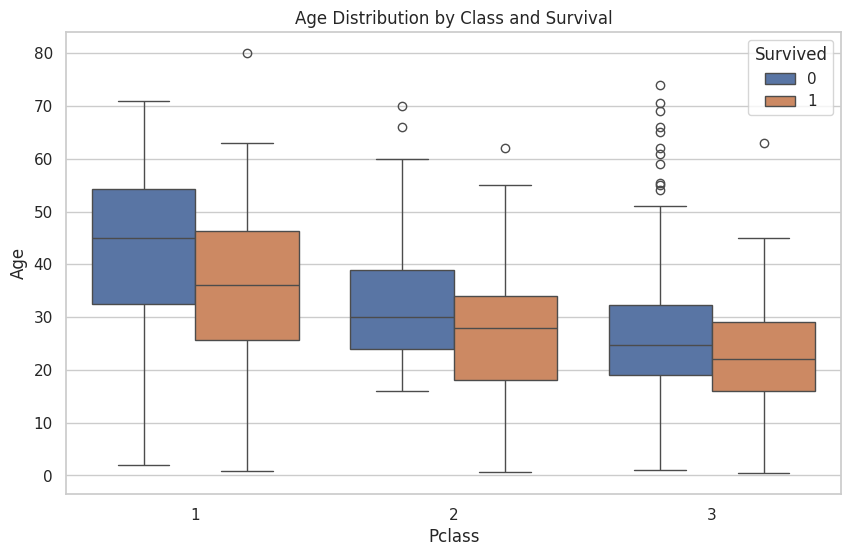

In [57]:
# Age distribution by class and survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df, x='Pclass', y='Age', hue='Survived')
plt.title('Age Distribution by Class and Survival')
plt.show()


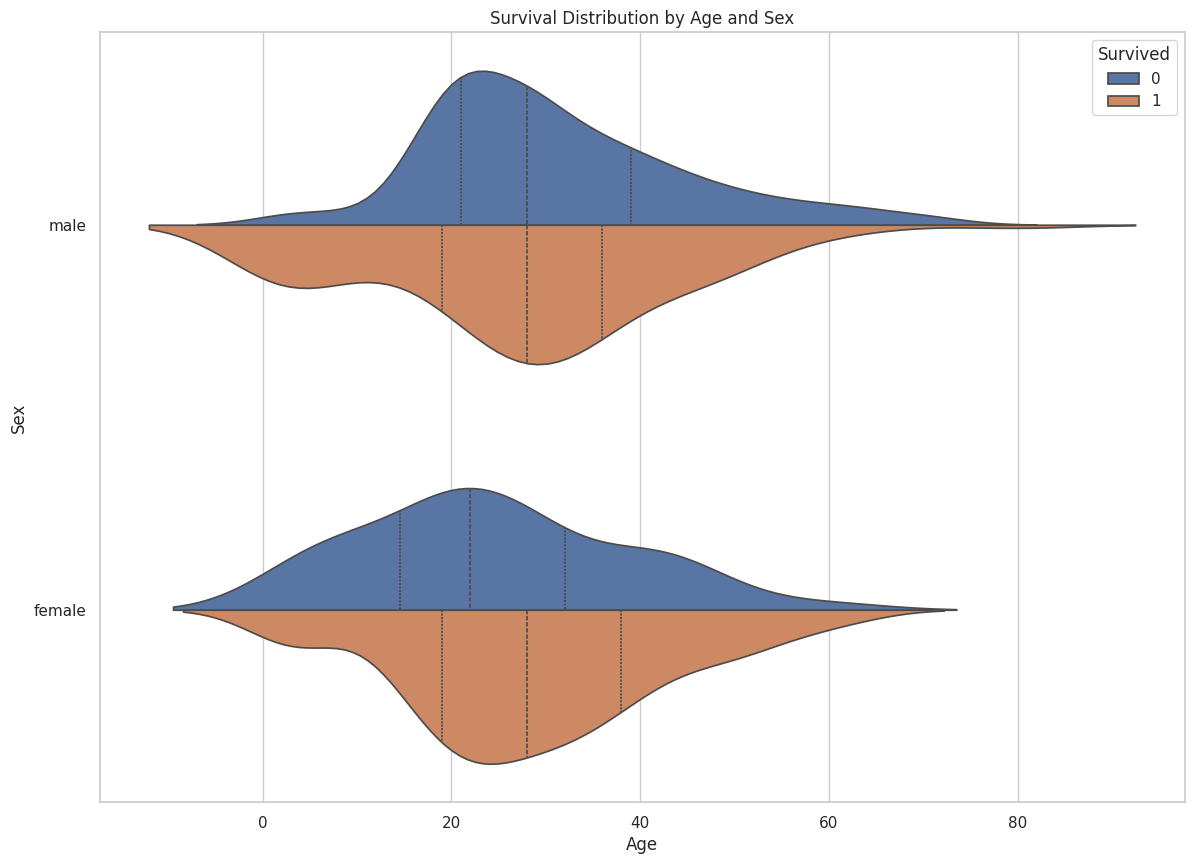

In [58]:
# Detailed survival rate by age and sex
plt.figure(figsize=(14, 10))
sns.violinplot(data=titanic_df, x='Age', y='Sex', hue='Survived', split=True, inner='quart')
plt.title('Survival Distribution by Age and Sex')
plt.show()